# Data Exploration

Imports:

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.linear_model import SGDClassifier

import re # Regular expression 
from langdetect import detect #Language detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud


Loading file:

In [29]:
df = pd.read_csv("data.csv")

#### Rows and columns

In [30]:
df.shape

(11113, 14)

In [31]:
df.head()

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
0,CeRUvKzq3n4,407.0,867.0,32400.0,792.0,0,1,diormakeup diorbeautylovers,2,person text hairpiece human face clothing scre...,אם את טסה בקרוב או שסתם באלך להתפנק במותג מהמם...,4d,05/06/2022,0.0
1,Cd4EPrQqumz,697.0,450.0,40600.0,125.0,0,0,NaN,0,NaN,أذكر تلك المقولة الس اخرة ثمة نوعان من الأغبيا...,1w,05/06/2022,0.0
2,CeT8winMlKi,928.0,234.0,5910.0,105.0,0,0,NaN,0,outdoor person sky clothing girl summer furnit...,תודה רבה על כל הברכות והאיחולים חיממתם לי ת לב,3d,05/06/2022,0.0
3,CeGNHlljW1M,22607.0,6.0,166000.0,2124.0,0,0,NaN,0,clothing human face person tie smile,تابعوا قناتنا تليجرام موجودة بالبايو من اجمل ا...,1w,05/06/2022,0.0
4,CeRBpNosRXh,1239.0,676.0,6542.0,40.0,0,0,foryou muscle musica fortnite 🌴 motivation for...,6,NaN,page,4d,05/06/2022,0.0


Dataframe description:

In [32]:
df.describe(include='all')

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
count,11113,1.036500e+04,10509.000000,1.050900e+04,10509.000000,11113.000000,11113.000000,9263,11113.000000,10481,11088,11111,11113,9808.000000
unique,10249,NaN,NaN,NaN,NaN,NaN,NaN,8122,NaN,8342,9554,215,22,NaN
top,Cd3IHD_KmBW,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,text,,1h,06/06/2022,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,139,NaN,179,606,1205,1141,NaN
mean,NaN,9.717736e+03,1201.794081,8.093296e+04,1334.813113,0.027535,0.172861,NaN,16.945559,NaN,NaN,NaN,NaN,0.133666
std,NaN,2.466031e+05,1674.326973,3.297725e+05,2775.201195,0.163645,0.378144,NaN,11.433369,NaN,NaN,NaN,NaN,0.340311
min,NaN,2.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2.110000e+02,181.000000,4.154000e+03,194.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,5.780000e+02,587.000000,1.450000e+04,524.000000,0.000000,0.000000,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,1.924000e+03,1344.000000,5.490000e+04,1366.000000,0.000000,0.000000,NaN,28.000000,NaN,NaN,NaN,NaN,0.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11113 non-null  object 
 1   likes           10365 non-null  float64
 2   following       10509 non-null  float64
 3   followers       10509 non-null  float64
 4   posts_amount    10509 non-null  float64
 5   celeb           11113 non-null  int64  
 6   pic_vid         11113 non-null  int64  
 7   hashtag         9263 non-null   object 
 8   hashtag_amount  11113 non-null  int64  
 9   pCo             10481 non-null  object 
 10  content         11088 non-null  object 
 11  post_date       11111 non-null  object 
 12  curr_date       11113 non-null  object 
 13  predict         9808 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [34]:
df.columns

Index(['id', 'likes', 'following', 'followers', 'posts_amount', 'celeb',
       'pic_vid', 'hashtag', 'hashtag_amount', 'pCo', 'content', 'post_date',
       'curr_date', 'predict'],
      dtype='object')

# Data cleaning

##### Removing rows with same post id

In [35]:
df.drop_duplicates("id",keep='last', inplace=True)

Removing rows with NaN (enough one column that has Nan to remove the row)

In [36]:
df.dropna(inplace=True)

Removing rows that on "content" column the language is not english

In [37]:
# check if text is in english if not, drop row
for index,row in df.iterrows():
        try:
                if detect(row['content']) != 'en':
                        df.drop(index, inplace=True)                
        except:
                pass

Removing "#" text from "content" and "hashtag" columns

In [38]:
# clean text from "content"
for index,row in df.iterrows():
        text = row['content']
        if '#' in text:
                clean_text = text.replace('#', ' ')
                df.at[index,'content'] = clean_text

In [39]:
# clean text from hashtag
for index,row in df.iterrows():
        text = row['hashtag']
        if '#' in text:
                clean_text = text.replace('#', ' ')
                df.at[index,'hashtag'] = clean_text

In [40]:
df.shape

(4411, 14)

In [41]:
df.head()

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
13,CeGcpDcNfCk,27418.0,70.0,53000.0,789.0,0,0,iansomerhalder damonsalvatore tvd thevampiredi...,30,person bride kiss wedding dress love female pe...,Comment Your Favorite Heart Emoji Letter by le...,1w,05/06/2022,1.0
19,Ceb37QdvpTh,252.0,1018.0,263000.0,11950.0,0,0,BlackBrides BlackWoman BlackQueens Melanina Bl...,22,text bride person wedding dress clothing femal...,,39m,05/06/2022,0.0
22,Ceb5Q_OMFEp,144.0,569.0,23100.0,672.0,0,0,sunset sunrise sunsets sunsetlovers sunsetpics...,30,animal aquatic bird bird outdoor sea gull wate...,s lovers pics _vision photography porn lover ...,30m,05/06/2022,0.0
28,Ceb5bAghP8k,310.0,496.0,33100.0,269.0,0,0,love lifequotes live fashion travel style blog...,13,person fashion accessory clothing handbag woma...,Enjoy life there s plenty of time to be dead,36m,05/06/2022,0.0
30,Ceb3FyBoWkx,180.0,1608.0,5798.0,561.0,0,0,mirror_of_our_souls moody_captures artistry_fl...,31,black and white still life photography vase fl...,My slightly different lookingranunculus,58m,05/06/2022,0.0


In [42]:
df['predict'].value_counts()

0.0    3870
1.0     541
Name: predict, dtype: int64

As we can see, we have more unsuccessful posts then successful ones. This is because I haven't minded the post date.
For example, there is diffrence between post that was uploaded 3 hours ago and post uploaded 2 days ago.
So I have decided to recalculate the "Prediction" column.

In [43]:
# We understand that we need to refer to the time when the post was published.
# Changing the definition of success
#   for d we will check for 0.20 likes/followers ratio
#   for h we will check for 0.15 likes/followers ratio
#   for m we will check for 0.10 likes/followers ratio
for index,row in df.iterrows():
        if 'd' in row['content']:
            if row['likes']/row['followers'] > 0.20:
                df.at[index,'predict'] = 1

        elif 'h' in row['content']:
            if row['likes']/row['followers'] > 0.15:
                df.at[index,'predict'] = 1

        elif 'm' in row['content']:
            if row['likes']/row['followers'] > 0.10:
                df.at[index,'predict'] = 1

In [44]:
df['predict'].value_counts()

0.0    3634
1.0     777
Name: predict, dtype: int64

([<matplotlib.patches.Wedge at 0x288d2aa5280>,
 [Text(-0.9358205772667558, 0.5781348001669818, '0'),
  Text(0.935820523137865, -0.5781348877848256, '1')],
 [Text(-0.5104475876000486, 0.31534625463653554, '82.4%'),
  Text(0.510447558075199, -0.31534630242808664, '17.6%')])

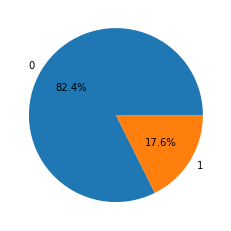

In [45]:
plt.pie(df['predict'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')

##### Since our predict column is not balanced, we need to balance it:

In [46]:
# we will duplicate the rows with prediction '1' to balance with '0'
df_duplicate = df.copy()
for i in range(1,3):
    for index, row in df.iterrows():
        if row['predict'] == 1:
            df_duplicate = df_duplicate.append(row)
df_duplicate.shape
print(df_duplicate['predict'].value_counts())

0.0    3634
1.0    2331
Name: predict, dtype: int64


([<matplotlib.patches.Wedge at 0x288cec55280>,
 [Text(-0.3700759133712375, 1.035878283555768, '0'),
  Text(0.3700759133712374, -1.0358782835557683, '1')],
 [Text(-0.20185958911158408, 0.5650245183031462, '60.9%'),
  Text(0.20185958911158403, -0.5650245183031463, '39.1%')])

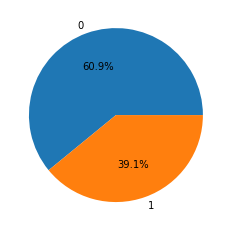

In [47]:
plt.pie(df_duplicate['predict'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')

# Now we will start with the EDA

In [48]:
df_post_success = df_duplicate[df_duplicate['predict'] == 1]
df_post_unsccess = df_duplicate[df_duplicate['predict'] == 0]

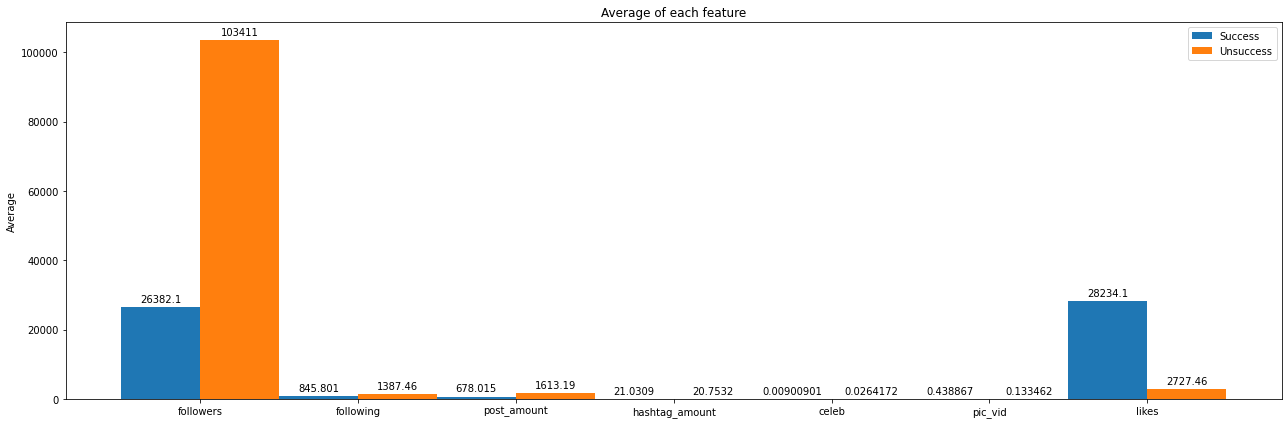

In [49]:
labels = ['followers', 'following', 'post_amount', 'hashtag_amount', 'celeb', 'pic_vid', 'likes']
success_means = [df_post_success['followers'].mean(), df_post_success['following'].mean(), df_post_success['posts_amount'].mean(), df_post_success['hashtag_amount'].mean(), df_post_success['celeb'].mean(), df_post_success['pic_vid'].mean(), df_post_success['likes'].mean()]
unsuccess_means = [df_post_unsccess['followers'].mean(), df_post_unsccess['following'].mean(), df_post_unsccess['posts_amount'].mean(), df_post_unsccess['hashtag_amount'].mean(), df_post_unsccess['celeb'].mean(), df_post_unsccess['pic_vid'].mean(), df_post_unsccess['likes'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots(figsize=(18,6))
rects1 = ax.bar(x - width/2, success_means, width, label='Success')
rects2 = ax.bar(x + width/2, unsuccess_means, width, label='Unsuccess')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average')
ax.set_title('Average of each feature')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


### Heatmap correlation

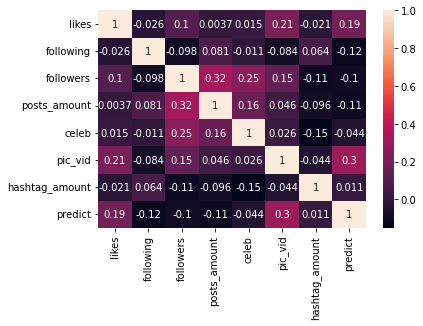

In [50]:
# plot the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

### Diffrence between videos and pictures of successful and unsuccessful posts

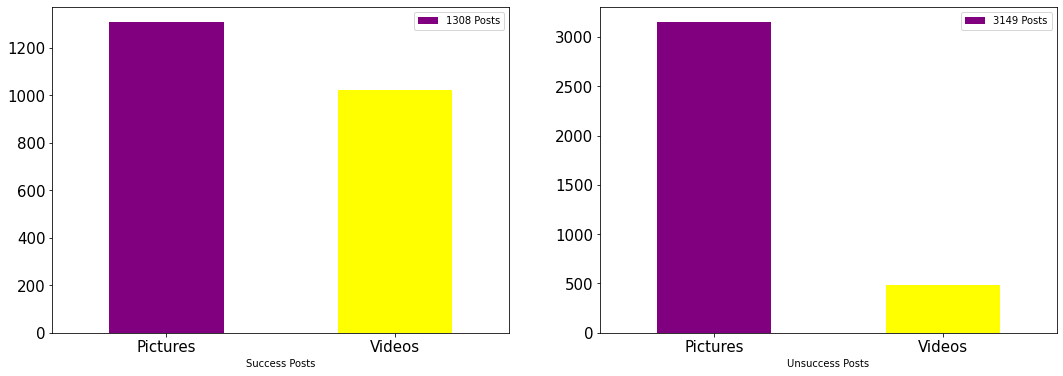

In [51]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
df_post_success = df_duplicate[df_duplicate['predict'] == 1]
df_post_unsuccess = df_duplicate[df_duplicate['predict'] == 0]

success_pic = len(df_post_success[df_post_success['pic_vid'] == 0])
success_vid = len(df_post_success[df_post_success['pic_vid'] == 1])

unsuccess_pic = len(df_post_unsuccess[df_post_unsuccess['pic_vid'] == 0])
unsuccess_vid = len(df_post_unsuccess[df_post_unsuccess['pic_vid'] == 1])

df_success = pd.DataFrame({'Success Posts': ['Pictures', 'Videos'], 'Values': [success_pic, success_vid]})
df_unsuccess = pd.DataFrame({'Unsuccess Posts': ['Pictures', 'Videos'], 'Values': [unsuccess_pic, unsuccess_vid]})

df_success.plot(kind='bar', ax=axes[0], x='Success Posts', y='Values', fontsize=15, rot=0, color=['purple', 'yellow'])
df_unsuccess.plot(kind='bar', ax=axes[1], x='Unsuccess Posts', y='Values', fontsize=15, rot=0, color=['purple', 'yellow'])
axes[0].legend([str(success_pic) + ' Posts'])
axes[1].legend([str(unsuccess_pic) + ' Posts'])


### This graph shows us that in many succsefull posts, most of the users used 30 diffrent hashtags on their posts

<AxesSubplot:title={'center':'Amount of hashtags used in success posts'}, xlabel='Used Hashtags', ylabel='Amount of times'>

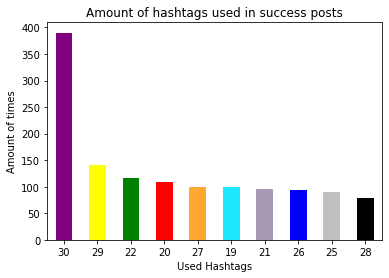

In [52]:
hashtag_series = df_post_success['hashtag_amount'].value_counts(ascending=False)[:10].sort_values(ascending = False)
hashtag_series.plot(kind='bar',x= "Hashtags", y= "Amount", rot=0, 
color=['purple', 'yellow', 'green','red', '#FEA82F','#1BE7FF','#A599B5', 'blue', 'silver', 'black'],
xlabel="Used Hashtags", ylabel="Amount of times", title="Amount of hashtags used in success posts")

### A conclusion can be drawn, for a successful post, does not have to be a celeb

<AxesSubplot:xlabel='Unsuccess Posts'>

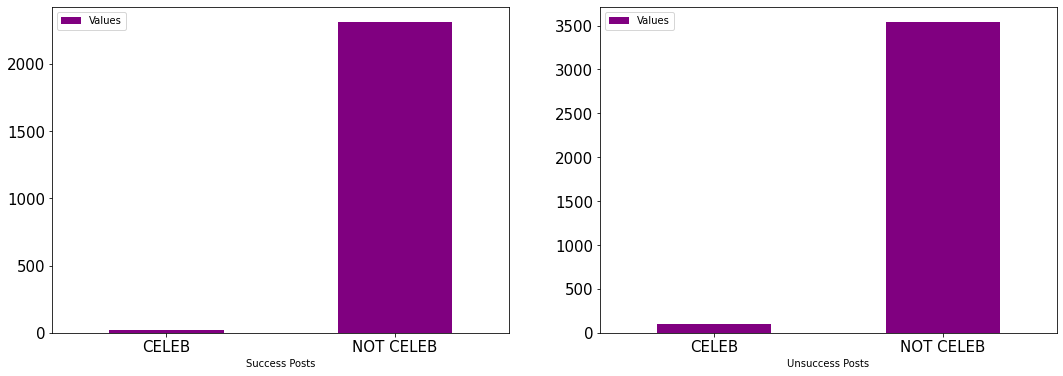

In [53]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

success_not_celeb = len(df_post_success[df_post_success['celeb'] == 0])
success_celeb = len(df_post_success[df_post_success['celeb'] == 1])

unsuccess_not_celeb = len(df_post_unsuccess[df_post_unsuccess['celeb'] == 0])
unsuccess_celeb = len(df_post_unsuccess[df_post_unsuccess['celeb'] == 1])

df_success = pd.DataFrame({'Success Posts': ['CELEB', 'NOT CELEB'], 'Values': [success_celeb, success_not_celeb]})
df_unsuccess = pd.DataFrame({'Unsuccess Posts': ['CELEB', 'NOT CELEB'], 'Values': [unsuccess_celeb, unsuccess_not_celeb]})

df_success.plot(kind='bar', ax=axes[0], x='Success Posts', fontsize=15, rot=0, color=['purple', 'yellow'])
df_unsuccess.plot(kind='bar', ax=axes[1], x='Unsuccess Posts', fontsize=15, rot=0, color=['purple', 'yellow'])

In [54]:
top_ten = df.nlargest(10,'likes').head(10)
top_ten

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
7014,Ce1ERIsF8ay,2028683.0,158.0,20100.0,627.0,0,1,food foodie chaat tikkichaat alootikkichaat ga...,14,human face person clothing man chin,एक ब र म 1000 Aloo Tikki Chaat Banta hai Famou...,1d,17/06/2022,1.0
2237,CeX9tJXsMEX,1757671.0,573.0,7162.0,63.0,0,1,eddiemunson eddiemunsonedit eddiemunsonedits h...,19,person human face clothing text smile,ST4 scenes used the best new character ever c...,1w,13/06/2022,1.0
934,CeYk4-OKLHn,1011062.0,2.0,45900.0,478.0,0,1,kids baby instakidsfashion kidsfun kidsstyles ...,19,sketch drawing child art illustration animated...,Dm for crédit fun styles books room party bra...,3d,08/06/2022,1.0
7464,CeoXTqFjLW0,767631.0,6945.0,65200.0,400.0,0,1,crocodile alligator crocodylusporosus bosscroc...,32,animal mammal reptile crocodilian reptile croc...,Tag someone that needs to see this Credit s so...,1w,20/06/2022,1.0
7015,Ceyg9OII5Sk,573069.0,2974.0,20400.0,338.0,0,1,streetfoodblogger streetfoodpakistan streetfoo...,25,person human face selfie clothing smile happy,The Perfect Anda Shaami Burger Cheese in this ...,2d,17/06/2022,1.0
2222,CeV_0njMcDU,451068.0,47.0,41300.0,334.0,0,0,lol memes johnnydepp johnydepp johnnydeppactor...,9,text person human face clothing handwriting,actorfansisinnocen,1w,13/06/2022,1.0
4312,Cd_F7a8NZPs,413209.0,3842.0,131000.0,927.0,0,1,beautyqueen beautycare beautyproducts beautyad...,29,person human face indoor selfie,Get the perfect stacked earring look without t...,1w,06/06/2022,1.0
6751,CeygwcAA4rV,355610.0,92.0,641000.0,1632.0,0,1,fixing tools cool design equipment idea engine...,20,text,When its not your time to go yet Follow to see...,23h,15/06/2022,1.0
2163,CeV-qy3oY2U,353219.0,144.0,51100.0,696.0,0,1,mahkum السجين,2,human face smile long hair girl female person,,1w,12/06/2022,1.0
8876,Cd0f3GEI7tp,347217.0,304.0,195000.0,850.0,0,1,mechanicalism mechanicalism mechanicalism tech...,33,text font logo graphics graphic design symbol ...,Caption this Old fashion and luxurious cigaret...,4w,20/06/2022,1.0


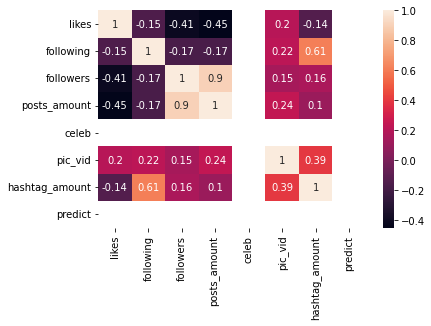

In [55]:
sns.heatmap(top_ten.corr(), annot=True)
plt.show()

# LogisticRegression:
+ Split the data to train and test

In [56]:
X = df_duplicate.copy()
y = df_duplicate['predict']
X.drop(['id','content','pCo','content','post_date','curr_date','predict', 'hashtag', 'likes'], axis=1, inplace=True) # drop everything not numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [57]:
# standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [60]:
model = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred)
lr_r2_score = r2_score(y_test, y_pred)
lr_accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

redDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
# measure of the test's accuracy and precision
print("f1 score: %.2f" % score)
# the score means that the the two variables are perfectly correlated if 100%
print("r2 score: %.2f" % lr_r2_score)
print("Accuracy: %.2f" % lr_accuracy)

#print(redDF)

f1 score: 0.00
r2 score: -0.65
Accuracy: 0.61


# RandomForestRegressor:
+ first we find best num estimator

In [61]:
parameters = {'n_estimators':[11, 51, 71]}
forest = RandomForestClassifier()
clf = GridSearchCV(forest, parameters, cv=10, scoring=make_scorer(metrics.f1_score))
model_forest = clf.fit(X_train, y_train)
y_pred_rf = model_forest.predict(X_test)

RF_accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_rf)
RF_f1_score = f1_score(y_test, y_pred_rf)
print('Random forest f1 score = ', RF_f1_score)
print('Random forest accuracy on test data = ', RF_accuracy)
print("Random forest recall:",metrics.recall_score(y_test, y_pred_rf))

Random forest f1 score =  0.8992661774516345
Random forest accuracy on test data =  0.9156424581005587
Random forest recall: 0.9573863636363636


# SVM algorithm:

In [84]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_svm_train_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_svm_train_predict))
print("Precision:",metrics.precision_score(y_test, y_svm_train_predict))
print("Recall:",metrics.recall_score(y_test, y_svm_train_predict))

Accuracy: 0.7156424581005587
Precision: 0.6744186046511628
Recall: 0.5355113636363636


Evaluation graph:

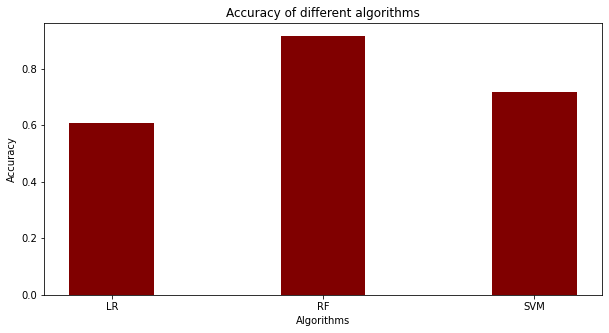

In [85]:
data = {'LR':lr_accuracy, 'RF':RF_accuracy, 'SVM':metrics.accuracy_score(y_test, y_svm_train_predict)}
ML_model = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(ML_model, values, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")
plt.show()

# Now we will do some text exploration

In [63]:
def convert_list_to_text(list):
    lines = []
    for line in list:
        line = line.strip().lower()
        if len(line)==0:
            continue
        lines.append(line)
    text = " ".join(lines)
    return text

In [64]:
# hashtag
hashtag_text = convert_list_to_text(df_duplicate['hashtag'].to_list())
vectorizer_hashtag = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_hashtag = vectorizer_hashtag.fit_transform([hashtag_text]).toarray()
freqDistHashtag = dict(zip(vectorizer_hashtag.get_feature_names_out(),freq_vec_hashtag[0]))
freqDistHashtag=dict(sorted(freqDistHashtag.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

# content
content_text = convert_list_to_text(df_duplicate['content'].to_list())
vectorizer_content = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_content = vectorizer_content.fit_transform([content_text]).toarray()
freqDistcontent = dict(zip(vectorizer_content.get_feature_names_out(),freq_vec_content[0]))
freqDistcontent=dict(sorted(freqDistcontent.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

# pCo
pCo_text = convert_list_to_text(df_duplicate['pCo'].to_list())
vectorizer_pCo = CountVectorizer(lowercase=True,stop_words="english",max_features=100)
freq_vec_pCo = vectorizer_pCo.fit_transform([pCo_text]).toarray()
freqDistpCo = dict(zip(vectorizer_pCo.get_feature_names_out(),freq_vec_pCo[0]))
freqDistpCo=dict(sorted(freqDistpCo.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

#### Here we can see that "love" is used in almost 800 posts.

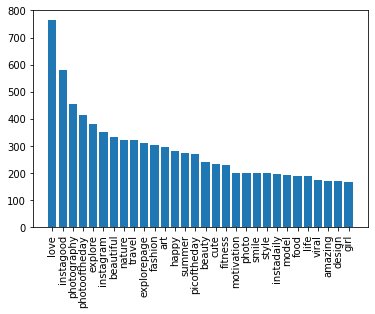

In [65]:
# hashtag
topK=30
plt.bar(list(freqDistHashtag.keys())[:topK], list(freqDistHashtag.values())[:topK])
plt.xticks(list(freqDistHashtag.keys())[:topK], rotation='vertical')
plt.show()

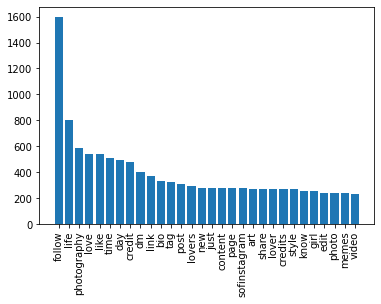

In [66]:
# content
topK=30
plt.bar(list(freqDistcontent.keys())[:topK], list(freqDistcontent.values())[:topK])
plt.xticks(list(freqDistcontent.keys())[:topK], rotation='vertical')
plt.show()

#### Pictures of Person/Human are more common on posts.

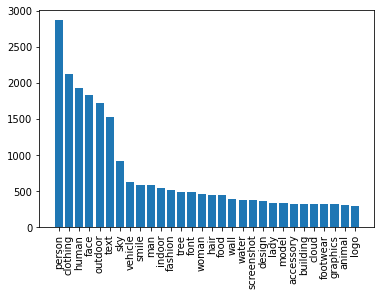

In [67]:
# pCo
topK=30
plt.bar(list(freqDistpCo.keys())[:topK], list(freqDistpCo.values())[:topK])
plt.xticks(list(freqDistpCo.keys())[:topK], rotation='vertical')
plt.show()

#### WordCloud

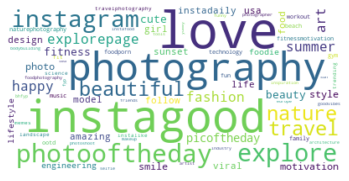

In [68]:
# hashtag
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistHashtag)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

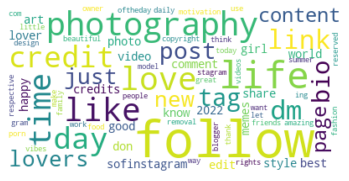

In [69]:
# content (post text)
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistcontent)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

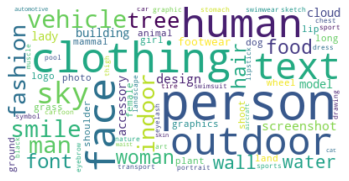

In [70]:
# pCo (Picture description)
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=60, max_words=75, background_color="white").generate_from_frequencies(freqDistpCo)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text processing - Text Classification

In [71]:
#train the model with hashtag
X_train_counts = vectorizer_hashtag.fit_transform(df_duplicate['hashtag'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [72]:
text_clf_nb_hashtag = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_hashtag.fit(df_duplicate['hashtag'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [73]:
predicted = text_clf_nb_hashtag.predict(df_duplicate['hashtag'])
np.mean(predicted == df_duplicate['predict'])

0.7134953897736798

We achieved 71.4% accuracy. Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by simply plugging a different classifier object into our pipeline:

In [74]:
text_clf_svm_hashtag = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_hashtag.fit(df_duplicate['hashtag'], df_duplicate['predict'])

predicted_hashtag = text_clf_svm_hashtag.predict(df_duplicate['hashtag'])
np.mean(predicted_hashtag == df_duplicate['predict'])

0.6266554903604359

In [75]:
#train the model with content
X_train_counts = vectorizer_content.fit_transform(df_duplicate['content'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [76]:
text_clf_nb_content = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_content.fit(df_duplicate['content'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [77]:
predicted_content = text_clf_nb_content.predict(df_duplicate['content'])
np.mean(predicted_content == df_duplicate['predict'])

0.6730930427493713

In [78]:
text_clf_svm_content = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_content.fit(df_duplicate['content'], df_duplicate['predict'])

predicted = text_clf_svm_content.predict(df_duplicate['content'])
np.mean(predicted == df_duplicate['predict'])

0.6117351215423302

In [79]:
#train the model with pCo
X_train_counts = vectorizer_pCo.fit_transform(df_duplicate['pCo'])
X_train_normalized = preprocessing.normalize(X_train_counts, norm='l1')
clf = MultinomialNB().fit(X_train_normalized, df_duplicate['predict'])

In [80]:
text_clf_nb_pCo = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
])
text_clf_nb_pCo.fit(df_duplicate['pCo'], df_duplicate['predict'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('norm', Normalizer(norm='l1')), ('clf', MultinomialNB())])

In [81]:
predicted_pCo = text_clf_nb_pCo.predict(df_duplicate['pCo'])
np.mean(predicted_pCo == df_duplicate['predict'])

0.636211232187762

In [82]:
text_clf_svm_pCo = Pipeline([
    ('vect', CountVectorizer(stop_words="english",max_features=1000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf_svm_pCo.fit(df_duplicate['pCo'], df_duplicate['predict'])

predicted = text_clf_svm_pCo.predict(df_duplicate['pCo'])
np.mean(predicted == df_duplicate['predict'])

0.6132439228834871

Evaluation for the content type:

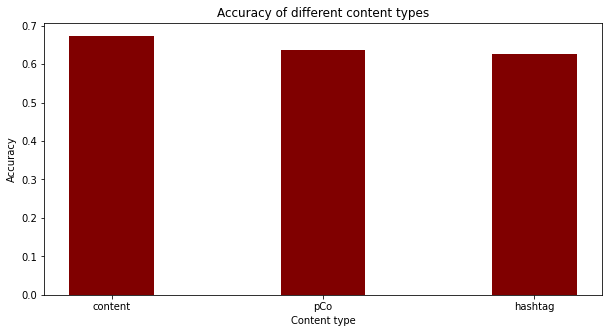

In [83]:
data = {'content':np.mean(predicted_content == df_duplicate['predict']),
        'pCo':np.mean(predicted_pCo == df_duplicate['predict']),
        'hashtag':np.mean(predicted_hashtag == df_duplicate['predict'])}
content_type_accuracy = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(content_type_accuracy, values, color ='maroon', width = 0.4)
 
plt.xlabel("Content type")
plt.ylabel("Accuracy")
plt.title("Accuracy of different content types")
plt.show()